In [1]:
import matplotlib.pyplot as plt
import numpy as np
from gfile_reader import gfile_read
from calc_bdry import calc_bdry
from calc_bdry import calc_xpoints
from calc_bdry import calc_strikepts
from calc_bdry import calc_alphas

In [2]:
eqs = np.array(['sp_0_0.6', 'sp_1_0.6', 'sp_2_0.6', 'sp_3_0.6', 'sp_4_0.6'])
eqs = np.array(['sp_1_0.6',  'sp_2_0.6_b', 'sp_3_0.6_b', 'sp_4_0.6_b'])
ang_ui = []
ang_uo = []
ang_li = []
ang_lo = []
R_in = []
R_out = []
Z_in = []
Z_out = []
for i,eq in enumerate(eqs):
    #Read in a dictionary of the gfile information
    gfile_dict1 = gfile_read(file0=eq, silent=True)

    Psi_rad = gfile_dict1['PSIRZ']
    Psi = (2.0*np.pi)*Psi_rad  ##Convert from Wb/Rad to Wb
    R_grid = gfile_dict1['R_grid']
    Z_grid = gfile_dict1['Z_grid']
    Psi_bdry = gfile_dict1['SIBRY'] #In wb/Rad

    R_maxis = gfile_dict1['RMAXIS']
    Z_maxis = gfile_dict1['ZMAXIS']

    Limitr_R = gfile_dict1['RLIM']
    Limitr_Z = gfile_dict1['ZLIM']
    nlim = int(gfile_dict1['LIMITR'])
    Limitr_R = Limitr_R[0:nlim]
    Limitr_Z = Limitr_Z[0:nlim]

    #Calculate the dictionary with the plasma boundary and sepratrix coordinates 
    bdry_dict1 = calc_bdry(np.linspace(-np.pi, np.pi, 361), R_maxis, Z_maxis, R_grid, Z_grid,\
    Psi_rad, Psi_bdry, xpt2=False, show_calc=False, reducebdry=0.0)# reducebdry=1.0)
    #Calculate the dictionary with the X-point coordinates
    xpoint_dict1 = calc_xpoints(R_grid, Z_grid, Psi_rad, Psi_bdry, Psi_restrict=False, xpt2_dict=False, show_calc=False)

    print(bdry_dict1.keys())
    #Calculate the upper strike pointc coordinates
    if i<1:
        key = 'sep2'
    else:
        key = 'sep'
    try:
        upstrkpt_dict1 = calc_strikepts(bdry_dict1['upper_' + key][0], bdry_dict1['upper_' + key][1], Limitr_R, Limitr_Z,\
        xpoint_dict1['upper_xpt'][0], xpoint_dict1['upper_xpt'][1], calc_angles=False, show_calc=False)

        x_strike_up1 = [float(upstrkpt_dict1['left_strkpt'][0]), float(upstrkpt_dict1['right_strkpt'][0])]
        y_strike_up1 = [float(upstrkpt_dict1['left_strkpt'][1]), float(upstrkpt_dict1['right_strkpt'][1])]

    except:
        x_strike_up1 = [0.0, 0.0]
        y_strike_up1 = [0.0, 0.0]
        print('Error in Finding Upper Strike Points')
    

    R_in.append(x_strike_up1[0])
    R_out.append(x_strike_up1[1])
    Z_in.append(y_strike_up1[0])
    Z_out.append(y_strike_up1[1])
    #Calculate the upper strike point angles (3D)
    upstrkpt_alpha_dict1 = calc_alphas(bdry_dict1['upper_' + key][0], bdry_dict1['upper_' + key][1], Limitr_R, Limitr_Z,\
    gfile_dict1, upstrkpt_dict1, n_phi=0.0, show_calc=False)
    ang_ui.append(upstrkpt_alpha_dict1['leftstrkpt_alpha'])
    ang_uo.append(upstrkpt_alpha_dict1['rightstrkpt_alpha'])

        #Calculate the lower strike pointc coordinates
    try:
        lowstrkpt_dict1 = calc_strikepts(bdry_dict1['lower_' + key][0], bdry_dict1['lower_' + key][1], Limitr_R, Limitr_Z,\
        xpoint_dict1['lower_xpt'][0], xpoint_dict1['lower_xpt'][1], calc_angles=True, show_calc=False)

        x_strike_low1 = [float(lowstrkpt_dict1['left_strkpt'][0]), float(lowstrkpt_dict1['right_strkpt'][0])]
        y_strike_low1 = [float(lowstrkpt_dict1['left_strkpt'][1]), float(lowstrkpt_dict1['right_strkpt'][1])]
    except:
        x_strike_low1 = [0.0, 0.0]
        y_strike_low1 = [0.0, 0.0]
        print('Error in Finding Lower Strike Points')
    #Calculate the lower strike point angles (3D)
    lowstrkpt_alpha_dict1 = calc_alphas(bdry_dict1['lower_' + key][0], bdry_dict1['lower_' + key][1], Limitr_R, Limitr_Z,\
    gfile_dict1, lowstrkpt_dict1, n_phi=0.0, show_calc=False)

    ang_li.append(lowstrkpt_alpha_dict1['leftstrkpt_alpha'])
    ang_lo.append(lowstrkpt_alpha_dict1['rightstrkpt_alpha'])

odict_keys(['plasma_bdry', 'upper_sep2', 'upper_sep', 'lower_sep', 'lower_sep2'])
[1.21982036 1.05262165]


/var/folders/hx/px24dh2d0bv8fs3t0c3v7ymm0000gn/T/ipykernel_23218/1558383187.py:46: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x_strike_up1 = [float(upstrkpt_dict1['left_strkpt'][0]), float(upstrkpt_dict1['right_strkpt'][0])]
/var/folders/hx/px24dh2d0bv8fs3t0c3v7ymm0000gn/T/ipykernel_23218/1558383187.py:47: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_strike_up1 = [float(upstrkpt_dict1['left_strkpt'][1]), float(upstrkpt_dict1['right_strkpt'][1])]


[1.05261991 1.22003282]


/var/folders/hx/px24dh2d0bv8fs3t0c3v7ymm0000gn/T/ipykernel_23218/1558383187.py:70: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x_strike_low1 = [float(lowstrkpt_dict1['left_strkpt'][0]), float(lowstrkpt_dict1['right_strkpt'][0])]
/var/folders/hx/px24dh2d0bv8fs3t0c3v7ymm0000gn/T/ipykernel_23218/1558383187.py:71: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_strike_low1 = [float(lowstrkpt_dict1['left_strkpt'][1]), float(lowstrkpt_dict1['right_strkpt'][1])]


odict_keys(['plasma_bdry', 'upper_sep', 'lower_sep'])
[1.25271693 1.1239256 ]
[1.12759813 1.25372   ]
odict_keys(['plasma_bdry', 'upper_sep', 'lower_sep'])
[1.25277618 1.13510966]
[1.13583249 1.25272288]
odict_keys(['plasma_bdry', 'upper_sep2', 'upper_sep', 'lower_sep', 'lower_sep2'])
[1.24931188 1.1412018 ]
[1.14277947 1.24931337]


In [3]:
def find_dist(lim_R, lim_Z, sp_R, sp_Z, start_ind):
    dist = 0
    i = start_ind
    past = False
    while not past:
        next = np.sqrt((lim_R[i+1]-lim_R[i])**2 +(lim_Z[i+1]-lim_Z[i])**2 )
        to_point = np.sqrt((sp_R-lim_R[i])**2 +(sp_Z-lim_Z[i])**2 )
        if to_point<next:
            dist+=to_point
            return dist
        else:
            dist+=next
            i+=1
        

In [4]:
print(R_in)

[1.0526216453000636, 1.1239255973167341, 1.1351096631760595, 1.1412017968247552]


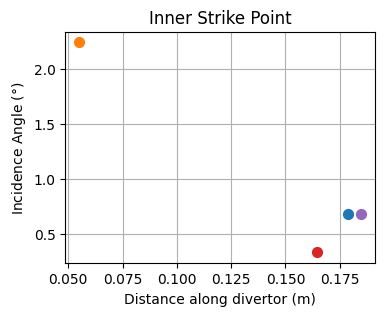

In [5]:
fig = plt.figure(figsize = (4,3))
colors = ['tab:orange', 'tab:red', 'tab:blue', 'tab:purple', 'tab:green' ]
for i in range(4):
    dist = find_dist(Limitr_R, Limitr_Z, R_in[i], Z_in[i], 121)
    plt.scatter(dist, ang_ui[i], color = colors[i], s = 50)

plt.xlabel('Distance along divertor (m)')
plt.ylabel(r'Incidence Angle ($\degree$)')
plt.title('Inner Strike Point')
plt.grid()


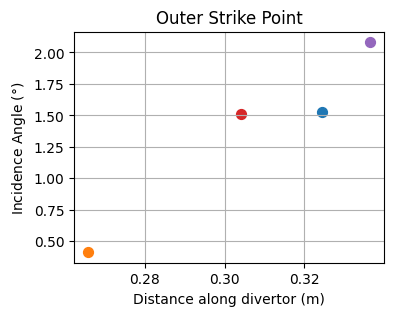

In [6]:
fig = plt.figure(figsize = (4,3))
colors = ['tab:orange', 'tab:red', 'tab:blue', 'tab:purple', 'tab:green' ]
for i in range(4):
    dist = find_dist(Limitr_R, Limitr_Z, R_out[i], Z_out[i], 121)
    plt.scatter(dist, ang_uo[i], color = colors[i], s = 50)

plt.xlabel('Distance along divertor (m)')
plt.ylabel(r'Incidence Angle ($\degree$)')
plt.title('Outer Strike Point')
plt.grid()


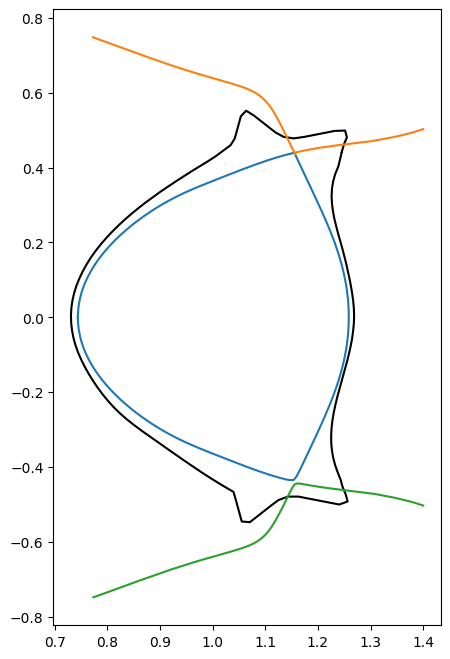

In [17]:
#Plotting 
#====================================================
plt.figure(figsize=(5,8))
plt.plot(Limitr_R, Limitr_Z, color='k') #Plot the limiter contour

plt.plot(bdry_dict1['plasma_bdry'][0], bdry_dict1['plasma_bdry'][1], color='tab:blue')
plt.plot(bdry_dict1['upper_sep'][0], bdry_dict1['upper_sep'][1], color='tab:orange')
plt.plot(bdry_dict1['lower_sep'][0], bdry_dict1['lower_sep'][1], color='tab:green')


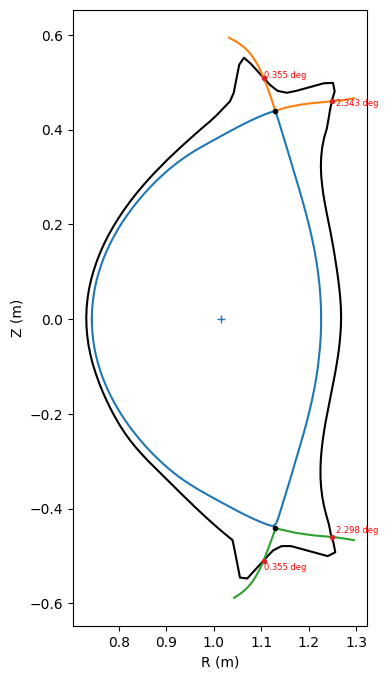

In [9]:
#Plotting 
#====================================================
plt.figure(figsize=(5,8))
plt.plot(Limitr_R, Limitr_Z, color='k') #Plot the limiter contour

plt.plot(bdry_dict1['plasma_bdry'][0], bdry_dict1['plasma_bdry'][1], color='tab:blue')
plt.plot(bdry_dict1['upper_sep'][0], bdry_dict1['upper_sep'][1], color='tab:orange')
plt.plot(bdry_dict1['lower_sep'][0], bdry_dict1['lower_sep'][1], color='tab:green')

#Plot the xpoints
plt.plot(xpoint_dict1['lower_xpt'][0], xpoint_dict1['lower_xpt'][1], marker='o', color='k', markersize=3)
plt.plot(xpoint_dict1['upper_xpt'][0], xpoint_dict1['upper_xpt'][1], marker='o', color='k', markersize=3)

#Plot the strike points
plt.plot(upstrkpt_dict1['left_strkpt'][0], upstrkpt_dict1['left_strkpt'][1], marker='o', color='tab:red', markersize=3)
plt.plot(upstrkpt_dict1['right_strkpt'][0], upstrkpt_dict1['right_strkpt'][1], marker='o', color='tab:red', markersize=3)

plt.plot(lowstrkpt_dict1['left_strkpt'][0], lowstrkpt_dict1['left_strkpt'][1], marker='o', color='tab:red', markersize=3)
plt.plot(lowstrkpt_dict1['right_strkpt'][0], lowstrkpt_dict1['right_strkpt'][1], marker='o', color='tab:red', markersize=3)

#Label the strike point incidence angles
plt.text(upstrkpt_dict1['left_strkpt'][0], upstrkpt_dict1['left_strkpt'][1]+0.001,\
str(round(upstrkpt_alpha_dict1['leftstrkpt_alpha'], 3))+' deg', color='r', fontsize=6)

plt.text(upstrkpt_dict1['right_strkpt'][0]+0.01, upstrkpt_dict1['right_strkpt'][1]-0.01,\
str(round(upstrkpt_alpha_dict1['rightstrkpt_alpha'], 3))+' deg', color='r', fontsize=6)

plt.text(lowstrkpt_dict1['left_strkpt'][0], lowstrkpt_dict1['left_strkpt'][1]-0.02,\
str(round(upstrkpt_alpha_dict1['leftstrkpt_alpha'], 3))+' deg', color='r', fontsize=6)

plt.text(lowstrkpt_dict1['right_strkpt'][0]+0.01, lowstrkpt_dict1['right_strkpt'][1]+0.01,\
str(round(lowstrkpt_alpha_dict1['rightstrkpt_alpha'], 3))+' deg', color='r', fontsize=6)


plt.plot(R_maxis, Z_maxis, marker='+', color='tab:blue')

plt.gca().set_aspect('equal')
plt.xlabel('R (m)')
plt.ylabel('Z (m)')
plt.show()

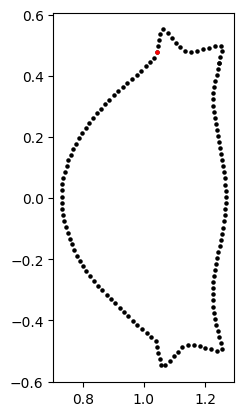

In [7]:
plt.scatter(Limitr_R, Limitr_Z, color='k', s = 5) #Plot the limiter contour
plt.gca().set_aspect(aspect = 1)
#Plot the strike points
ind = 121
plt.scatter(Limitr_R[ind], Limitr_Z[ind], s= 5, c = 'r')